# 3. Bringing Datasets Together

Let's start, as we always do, by importing the libraries we want to use.

In [1]:
import pandas as pd

Now, we'll load in a sample dataset that we'll use in our discussion of how to bring datasets together.

In [79]:
df_full_time = pd.read_excel('data/university.xlsx', sheet_name = 'full_time')
df_part_time = pd.read_excel('data/university.xlsx', sheet_name = 'part_time')
df_grades = pd.read_excel('data/university.xlsx', sheet_name = 'grades')

We'll use these dataframes to help us understand the basics of **joining data**. There are five types of joins (well, one quick one and four real ones).

To start our discussion, let's look at the data to see what we have.

In [80]:
df_part_time

,student_id,first_name,last_name,adviser
0,5,David,Freeman,Prof Duncan
1,6,Elizabeth,Brown,Prof Duncan
2,7,Amanda,Schultz,Prof Kennedy
3,8,Tanner,Perkins,Prof Alvarez
4,9,Ashley,Gonzales,Prof Kennedy
5,10,Latonya,Porter,Prof Alvarez
6,11,Jacinda,Peterson,Prof Alvarez


In [81]:
df_full_time

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan


Ok - So we have two dataframes of students, and each have the same columns. Our first method of bringing datasets together is a **UNION** - it's a bit of the forgotten stepchild of joins, but is worth talking about. Sometimes, you have two identical datasets that are in different files. The `pd.concat()` function lets you stack them one on top of the other.

In [82]:
df_students = pd.concat([df_full_time, df_part_time])
df_students

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan
0,5,David,Freeman,Prof Duncan
1,6,Elizabeth,Brown,Prof Duncan
2,7,Amanda,Schultz,Prof Kennedy
3,8,Tanner,Perkins,Prof Alvarez
4,9,Ashley,Gonzales,Prof Kennedy
5,10,Latonya,Porter,Prof Alvarez


We notice a few things. 
First - the indexes were maintained from each dataset. We have multiple things with an index of 0 (Melvin an David). This is not good. Luckily, last week we learned about reset_index() which allows us to reset the index. We also saw that we can do `drop=True` to drop the current index when we reset.

In [83]:
df_students = pd.concat([df_full_time, df_part_time]).reset_index(drop=True)
df_students

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan
4,5,David,Freeman,Prof Duncan
5,6,Elizabeth,Brown,Prof Duncan
6,7,Amanda,Schultz,Prof Kennedy
7,8,Tanner,Perkins,Prof Alvarez
8,9,Ashley,Gonzales,Prof Kennedy
9,10,Latonya,Porter,Prof Alvarez


Ok - fixed issue one.

Our second issue that we no longer know which students are full-time and which are part-time - in fact, we had data about each cohort **embedded in the file name of the cohort**. Let's make a new column in each dataframe, called `student_type`, that brings this data into our dataframe.

In [87]:
df_full_time['student_type'] = 'full_time'
df_part_time['student_type'] = 'part_time'
df_students = pd.concat([df_full_time, df_part_time]).reset_index(drop=True)
df_students

,student_id,first_name,last_name,adviser,student_type
0,1,Melvin,Ware,Prof Duncan,full_time
1,2,Thomas,Moore,Prof Brown,full_time
2,3,Joseph,Paul,Prof Alvarez,full_time
3,4,Sarah,Cruz,Prof Duncan,full_time
4,5,David,Freeman,Prof Duncan,part_time
5,6,Elizabeth,Brown,Prof Duncan,part_time
6,7,Amanda,Schultz,Prof Kennedy,part_time
7,8,Tanner,Perkins,Prof Alvarez,part_time
8,9,Ashley,Gonzales,Prof Kennedy,part_time
9,10,Latonya,Porter,Prof Alvarez,part_time


Wonderful - our students dataframe is looking good, thanks to the first of our joins.

Now, let's look at our third dataframe - grades.

In [30]:
df_grades

,student_id,final_grade
0,1,95
1,3,71
2,6,76
3,7,91
4,8,75
5,11,59
6,15,86


We have one record for each grade in the class. Each row has a student_id and a final grade.

We can use this to talk about four main kinds of joins - left, right, inner, and outer.

We talked in class about the different joins and how we'd model them as venn diagrams - the image below should seem familiar.

![Joins Image](https://miro.medium.com/v2/resize:fit:900/1*yb76Gk03pZsjVDp79n2yKA.jpeg)

Whenever we join data together, we need columns to link our two circles together - what do they have in common? The columns can have the same name or different names - there's a syntax for both cases - but we need the **join key**, and we need to be explicit about what it is.

I'll run through the different joins, using `pd.merge()` to make the left, right, join key (on='') and join type (aka `how`) explicit.

In [88]:
# Inner Join
# An inner join will only return records that exist on both sides of the join
# In this case - only grades that have students.
pd.merge(df_grades, df_students, on='student_id', how='inner')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95,Melvin,Ware,Prof Duncan,full_time
1,3,71,Joseph,Paul,Prof Alvarez,full_time
2,6,76,Elizabeth,Brown,Prof Duncan,part_time
3,7,91,Amanda,Schultz,Prof Kennedy,part_time
4,8,75,Tanner,Perkins,Prof Alvarez,part_time
5,11,59,Jacinda,Peterson,Prof Alvarez,part_time


In [90]:
# Left Join
# A left join will return all records on the left side.
# It will pull in any data on the right side that is a match
# In this case, it will return all grades, whether or not students exist

# Notice student_id = 15 - they have a grade, but don't exist in our students table
pd.merge(df_grades, df_students, on='student_id', how='left')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95,Melvin,Ware,Prof Duncan,full_time
1,3,71,Joseph,Paul,Prof Alvarez,full_time
2,6,76,Elizabeth,Brown,Prof Duncan,part_time
3,7,91,Amanda,Schultz,Prof Kennedy,part_time
4,8,75,Tanner,Perkins,Prof Alvarez,part_time
5,11,59,Jacinda,Peterson,Prof Alvarez,part_time
6,15,86,NaN,NaN,NaN,NaN


In [93]:
# Right Join
# A right join will return all records on the right side.
# It will pull in any data on the left side that is a match
# In this case, it will return all students, whether or not there is a grade

# Notice student_id = 15 is gone - since students is on the right,
# and they are not in students, we did not get them back
pd.merge(df_grades, df_students, on='student_id', how='right')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95.0,Melvin,Ware,Prof Duncan,full_time
1,2,NaN,Thomas,Moore,Prof Brown,full_time
2,3,71.0,Joseph,Paul,Prof Alvarez,full_time
3,4,NaN,Sarah,Cruz,Prof Duncan,full_time
4,5,NaN,David,Freeman,Prof Duncan,part_time
5,6,76.0,Elizabeth,Brown,Prof Duncan,part_time
6,7,91.0,Amanda,Schultz,Prof Kennedy,part_time
7,8,75.0,Tanner,Perkins,Prof Alvarez,part_time
8,9,NaN,Ashley,Gonzales,Prof Kennedy,part_time
9,10,NaN,Latonya,Porter,Prof Alvarez,part_time


In [94]:
# Outer Join
# An outer join will return all records on both sides, regardless of match
# In this case, it will return all students, and all grades
# But it will leave data empty if there is nothing
pd.merge(df_grades, df_students, on='student_id', how='outer')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95.0,Melvin,Ware,Prof Duncan,full_time
1,2,NaN,Thomas,Moore,Prof Brown,full_time
2,3,71.0,Joseph,Paul,Prof Alvarez,full_time
3,4,NaN,Sarah,Cruz,Prof Duncan,full_time
4,5,NaN,David,Freeman,Prof Duncan,part_time
5,6,76.0,Elizabeth,Brown,Prof Duncan,part_time
6,7,91.0,Amanda,Schultz,Prof Kennedy,part_time
7,8,75.0,Tanner,Perkins,Prof Alvarez,part_time
8,9,NaN,Ashley,Gonzales,Prof Kennedy,part_time
9,10,NaN,Latonya,Porter,Prof Alvarez,part_time


We talked about how it is most common to do left and inner joins. We also talked about how left joins and right joins are identical, but flipped. Our example in class was to talk about a database from a ride share company with 3 tables - drivers, ride_history, and push_notifications. Here was the mock code we did.

In [ ]:
pd.merge(drivers, ride_history, how='right', left_on='id', right_on='driver')
pd.merge(ride_history, drivers, how='left', right_on='id', left_on='driver')

## Constructing the Dig Orders Dataset

Now that we know about the different types of merges, let's make the Dig Orders dataset a bit more complete and nicer to work with. We're going to construct it by merging our df_orders with the other datasets on restaurants and menu items.

First, let's read our data in.

In [35]:
df_orders = pd.read_csv('data/simplified_orders.zip')
df_items = pd.read_csv('data/items.csv')
df_restaurants = pd.read_csv('data/restaurants.csv')

And our muscle memory checks to see what the data is.

In [36]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [101]:
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [102]:
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01


Everythings looks good - let's start merging. In class, I kept adding to one cell. Here, I'm going to break down the steps - so if there's more cells here than you have, that's ok!

Let's build our merge from base principles. Every merge has a left and a right (in order), join keys (`on`), and a join type (`how`).

This is the first time our join keys do not have the same name. Never fear - we can be explicit that we should join the `left_on` and the `right_on` different columns.

Let's start off by joining df_orders to df_items to get the name of our main in our dataset. Since we want all orders, whether or not there is a main, we want to LEFT JOIN our ORDERS to our ITEMS.

In [104]:
pd.merge(
    df_orders, # our left
    df_items, # our right
    how='left',
    left_on='MAIN',  # here, I tell Pandas the column in the left side that holds our join key 
    right_on='ITEM_ID' # and similarly, which column in the right side holds the join key
).head()  # I'll chain the head function here to print just a few lines.

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,I0,Charred Chicken Marketbowl,Mains
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,I0,Charred Chicken Marketbowl,Mains
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,I1,Spicy Meatballs Marketbowl,Mains


That looks pretty good! If you scroll horizontally, you'll see we have 3 new columns - ITEM_ID, ITEM_NAME and ITEM_TYPE. I think we can do a better job than this. We really just need one column - the name of the item - and we could call it the "MAIN_NAME" (since we'll likely have many names as we join things - and honestly, `name` is common enough that we should be specific).

Said differently - we can **bring in fewer columns to join** and then **rename and drop columns at the end**.

So let's do that - just like we can select columns with `[]` notation (passing in a list to select), we can do that in a merge. We can also then rename columns, and drop columns.

Let's do it step by step.

In [108]:
pd.merge(
    df_orders, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ], # on the right, select just these columns
    how='left', 
    left_on='MAIN', 
    right_on='ITEM_ID'
().head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,ITEM_NAME,ITEM_ID
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Charred Chicken Marketbowl,I0
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Charred Chicken Marketbowl,I0
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Spicy Meatballs Marketbowl,I1


In [110]:
pd.merge(
    df_orders, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ], # on the right, select just these columns
    how='left', 
    left_on='MAIN', 
    right_on='ITEM_ID'
).rename(columns={'ITEM_NAME':'MAIN_NAME'}).head()  # rename the item name column


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,ITEM_ID
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Charred Chicken Marketbowl,I0
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Charred Chicken Marketbowl,I0
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Spicy Meatballs Marketbowl,I1


In [111]:
# drop the column I don't need by chaining it to the end
pd.merge(
    df_orders, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ],
    how='left', 
    left_on='MAIN', 
    right_on='ITEM_ID'
).rename(columns={'ITEM_NAME':'MAIN_NAME'}).drop(columns='ITEM_ID').head() 

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Charred Chicken Marketbowl
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Charred Chicken Marketbowl
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Spicy Meatballs Marketbowl


This looks good! I don't have columns I don't need, and I have columns that I do, labeled well.

We then had a challenge to do this with Restaurants, taking on the column names that we wanted. Our solution is below.

In [ ]:
pd.merge(df_orders,
         df_restaurants[ ["RESTAURANT_ID","NAME"] ],
         how="left",
         on="RESTAURANT_ID",
        ).rename(columns={"NAME":"RESTAURANT_NAME"})

This became a building block for us to construct a new dataframe - one that I called df_orders2. We're going to keep merging new things to this dataset.

In [57]:
# FIRST MERGE - MERGE ORDERS AND RESTAURANTS TO CREATE DF2

df_orders2 = pd.merge(df_orders,
         df_restaurants[ ["RESTAURANT_ID","NAME"] ],
         how="left",
         on="RESTAURANT_ID",
        ).rename(columns={"NAME":"RESTAURANT_NAME"})

In [58]:
df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg


Now that I merged orders and restaurants, I need to merge orders to items, four times - one time for each of the main, base, side1 and side2 columns. Let's do that. First, familiarize ourselves with df_items so we know what we're joining.

In [63]:
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


Great - now, we'll merge orders2 with items, four times, using the same syntax we had before.

In [59]:
# FIRST df2 repeat merge - mains
df_orders2 = pd.merge(
    df_orders2, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ], 
    how='left', 
    left_on='MAIN', 
    right_on='ITEM_ID'
).rename(columns={'ITEM_NAME':'MAIN_NAME'}).drop(columns='ITEM_ID')

In [60]:
df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl


In [64]:
# second df2 repeat merge - bases
df_orders2 = pd.merge(
    df_orders2, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ], 
    how='left', 
    left_on='BASE', 
    right_on='ITEM_ID'
).rename(columns={'ITEM_NAME':'BASE_NAME'}).drop(columns='ITEM_ID')

df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables


In [65]:
# third df2 repeat merge - side1
df_orders2 = pd.merge(
    df_orders2, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ], 
    how='left', 
    left_on='SIDE_1', 
    right_on='ITEM_ID'
).rename(columns={'ITEM_NAME':'SIDE_1_NAME'}).drop(columns='ITEM_ID')

# fourth df2 repeat merge - side2
df_orders2 = pd.merge(
    df_orders2, 
    df_items[ ['ITEM_NAME','ITEM_ID'] ], 
    how='left', 
    left_on='SIDE_2', 
    right_on='ITEM_ID'
).rename(columns={'ITEM_NAME':'SIDE_2_NAME'}).drop(columns='ITEM_ID')

df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


Huzzah - we have a comprehensive df_orders2 dataframe. Look at what we can do now - analyze our data with actual words and not just IDs!

<Axes: xlabel='MAIN_NAME'>

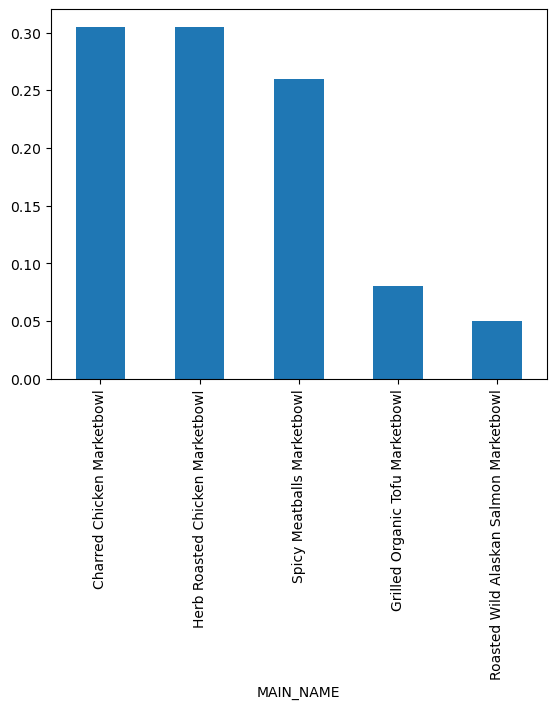

In [69]:
df_orders2.MAIN_NAME.value_counts(normalize=True).plot(kind='bar')

However, doing all of those joins is a bit inefficient. It's really the same join, 4 times, with a bit of an adjustment per column. Sounds like a loop! Here's a way of doing the same thing with a for loop to do all of the items.

In [112]:
# Alternative way way - looping.

# First - merge orders and restaurants.
df_orders3 = pd.merge(df_orders,
         df_restaurants[['RESTAURANT_ID', 'NAME']],
         left_on='RESTAURANT_ID',
         right_on='RESTAURANT_ID',
         how='left').rename(columns={'NAME': 'RESTAURANT_NAME'})

# Now - make a list of the columns for our items merge
columns = ['MAIN','BASE','SIDE_1','SIDE_2']

# for each column in that list - merge it to items
# note that we replace the left_on (to now join to the column in the list)
# we also replace the renaming function so we can make things work nicely.
for column in columns:
    df_orders3 = (pd.merge(df_orders3,
                          df_items[['ITEM_ID','ITEM_NAME']],
                          left_on=column,
                          right_on='ITEM_ID',
                          how='left')
                      .rename(columns={'ITEM_NAME':f'{column}_NAME'})
                      .drop(columns='ITEM_ID')
                 )

# And we end up with the same thing.
df_orders3.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


Let's write some CSVs out for this data.

In [71]:
df_orders3.to_csv('data/orders3.csv', index=False)

In [72]:
df_orders2.to_csv('data/orders2.csv', index=False)

### Edge Cases and Things To Avoid

We did talk about merging data to itself multiple times and the risks associated with it. Look at this example.

Imagine that I broke my big loop up into multiple pieces - first, I do restaurants in one cell. Then, I'll do the item loop in another cell.

In [114]:
# Alternative way way - looping.

# First - merge orders and restaurants.
df_orders4 = pd.merge(df_orders,
         df_restaurants[['RESTAURANT_ID', 'NAME']],
         left_on='RESTAURANT_ID',
         right_on='RESTAURANT_ID',
         how='left').rename(columns={'NAME': 'RESTAURANT_NAME'})

In [117]:


# Now - make a list of the columns for our items merge
columns = ['MAIN','BASE','SIDE_1','SIDE_2']

# for each column in that list - merge it to items
# note that we replace the left_on (to now join to the column in the list)
# we also replace the renaming function so we can make things work nicely.
for column in columns:
    df_orders4 = (pd.merge(df_orders4,
                          df_items[['ITEM_ID','ITEM_NAME']],
                          left_on=column,
                          right_on='ITEM_ID',
                          how='left')
                      .rename(columns={'ITEM_NAME':f'{column}_NAME'})
                      .drop(columns='ITEM_ID')
                 )

# And we end up with the same thing.
df_orders4.columns

Index(['ORDER_ID', 'DATETIME', 'RESTAURANT_ID', 'TYPE', 'DRINKS', 'COOKIES',
       'MAIN', 'BASE', 'SIDE_1', 'SIDE_2', 'RESTAURANT_NAME', 'MAIN_NAME',
       'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME', 'MAIN_NAME', 'BASE_NAME',
       'SIDE_1_NAME', 'SIDE_2_NAME', 'MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME',
       'SIDE_2_NAME'],
      dtype='object')

Oh boy - I have 3 `MAIN_NAME` columns. And the more I run it, the more it will expand. This is the downside - but, if you have a few hundred columns, just know that this can happen if you run the same cell multiple times. Restarting and running all is a good antidote.